# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_df = pd.read_csv("../cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

cities_df.head(3)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.5,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.8,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.2,2.37


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# List for holding temperature of each city
temp = []
humidity = []
cloudiness = []
windspeed = []
lat = []
city_name = []

# Loop through the list of cities and perform a request for data on each, while keeping count of the city number
for n, city in enumerate(cities, 1):
    
    # Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
       
    # Get weather info from JSON response and add to the list -- LOOK BACK AT TRY/EXCEPT
    try:    
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        lat.append(weather_json['coord']['lat'])       
        city_name.append(city)
        # print log of each city as it's being processed (city number and city name).
        print(f"[{n}]: {city.title()} processed.")
        
    except:
        # Skip over to the new city while counting city
        print(f"[{n}]: City not found.")
        pass
    

[1]: Laguna processed.
[2]: Albany processed.
[3]: Hilo processed.
[4]: Rikitea processed.
[5]: Georgetown processed.
[6]: Bengkulu processed.
[7]: Sao Filipe processed.
[8]: Ola processed.
[9]: Los Arabos processed.
[10]: Morlaix processed.
[11]: Khatanga processed.
[12]: Vardo processed.
[13]: Tasiilaq processed.
[14]: Kieta processed.
[15]: Punta Arenas processed.
[16]: Gubskaya processed.
[17]: Port Alfred processed.
[18]: Broken Hill processed.
[19]: City not found.
[20]: Vaini processed.
[21]: Mizan Teferi processed.
[22]: Yaan processed.
[23]: City not found.
[24]: Hirara processed.
[25]: Ushuaia processed.
[26]: Upernavik processed.
[27]: Hanna processed.
[28]: Los Alamos processed.
[29]: Corrales processed.
[30]: Atuona processed.
[31]: Hualmay processed.
[32]: City not found.
[33]: Clyde River processed.
[34]: Kuytun processed.
[35]: Dimona processed.
[36]: Ribeira Grande processed.
[37]: Kodiak processed.
[38]: Miandoab processed.
[39]: Povenets processed.
[40]: Acarau proce

[311]: Pandan Niog processed.
[312]: Saint-Joseph processed.
[313]: Dejen processed.
[314]: Mehamn processed.
[315]: Nerchinskiy Zavod processed.
[316]: Touros processed.
[317]: Panaba processed.
[318]: Sandpoint processed.
[319]: Saint-Alexandre processed.
[320]: Mackenzie processed.
[321]: Bereda processed.
[322]: Arsikere processed.
[323]: Ponta Do Sol processed.
[324]: Waipawa processed.
[325]: Machhlishahr processed.
[326]: Mexico processed.
[327]: City not found.
[328]: Huangpu processed.
[329]: Acajutla processed.
[330]: Uusikaupunki processed.
[331]: Cooma processed.
[332]: Aklavik processed.
[333]: Korla processed.
[334]: Omboue processed.
[335]: City not found.
[336]: San Quintin processed.
[337]: Taunggyi processed.
[338]: Rio Grande processed.
[339]: Tual processed.
[340]: City not found.
[341]: Nabire processed.
[342]: Akureyri processed.
[343]: Ilebo processed.
[344]: Mangan processed.
[345]: Lhokseumawe processed.
[346]: Lucea processed.
[347]: Meulaboh processed.
[348]:

[616]: Troitskiy processed.
[617]: Japura processed.
[618]: City not found.
[619]: City not found.
[620]: Chenove processed.
[621]: Dongsheng processed.
[622]: San Carlos processed.
[623]: Sioux Lookout processed.
[624]: Skibbereen processed.
[625]: Jiangmen processed.


In [7]:
# Checking how many city samples in total
len(temp)

577

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_api_data_df = pd.DataFrame({
    "City": city_name,
    "Latitude": lat,
    "Max Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": windspeed
    })

# Save Data to csv
cities_api_data_df.to_csv("Output Data/City_Data.csv")
cities_api_data_df.head()

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,laguna,38.42,73.40,53,1,10.29
1,albany,42.60,72.00,91,100,3.40
2,hilo,19.73,82.40,65,90,9.17
3,rikitea,-23.12,66.38,70,100,18.57
4,georgetown,5.41,84.20,79,20,2.24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
### USE THE STUFF HERE FOR GOING FORWARD WITH THE REST OF THE HW
humidity100_df = cities_api_data_df.loc[cities_api_data_df['Humidity (%)'] > 100, :]
humidity100_df.head(3)

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [10]:
#  Get the indices of cities that have humidity over 100%.
# https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer/42853445
humidity100_index = cities_api_data_df.loc[cities_api_data_df['Humidity (%)'] > 100, :].index.values.astype(int)
humidity100_index

array([], dtype=int32)

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

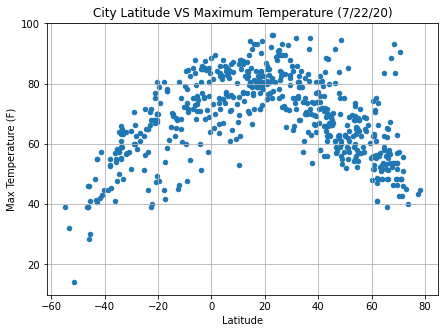

In [14]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Max Temperature (F)', title='City Latitude VS Maximum Temperature (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_maxT.png")
plt.show()

## Latitude vs. Humidity Plot

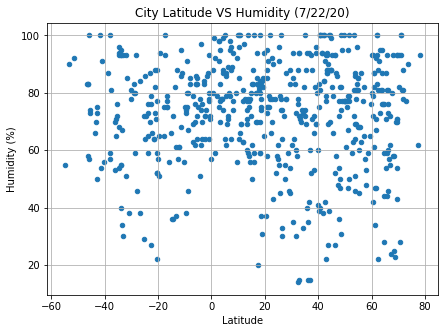

In [15]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='City Latitude VS Humidity (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

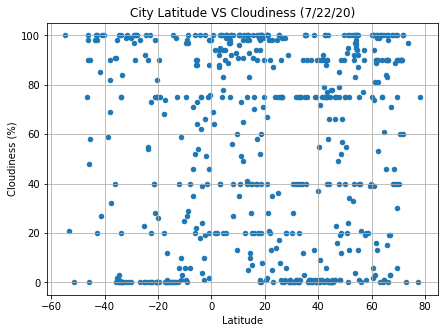

In [16]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='City Latitude VS Cloudiness (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

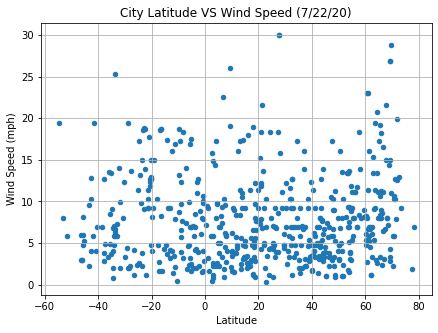

In [17]:
cities_api_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', title='City Latitude VS Wind Speed (7/22/20)', grid=True, figsize=(7,5))
plt.savefig("Output Data/latitude_windspeed.png")
plt.show()

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] >= 0, :]
southern_hem_df = cities_api_data_df.loc[cities_api_data_df['Latitude'] < 0, :]
cities_api_data_df

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,laguna,38.42,73.40,53,1,10.29
1,albany,42.60,72.00,91,100,3.40
2,hilo,19.73,82.40,65,90,9.17
3,rikitea,-23.12,66.38,70,100,18.57
4,georgetown,5.41,84.20,79,20,2.24
...,...,...,...,...,...,...
572,dongsheng,39.82,77.20,41,37,12.39
573,san carlos,9.66,73.08,92,60,2.13
574,sioux lookout,50.10,62.60,77,40,3.13
575,skibbereen,51.55,57.20,100,75,10.29


In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotweather(df,y, hem):
    # Scatter plot
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.title(f'{hem} Hemisphere - {y} vs. Latitude (7/22/20)')
    x = df['Latitude']
    y = df[y]
    plt.scatter(x, y)
    
    # Add linear regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    plt.plot(x,regress,"r-")
    print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46393899034626784


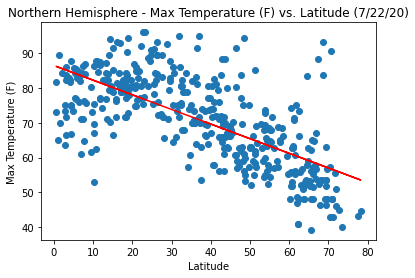

In [20]:
y = 'Max Temperature (F)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)
    
# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5566295860581401


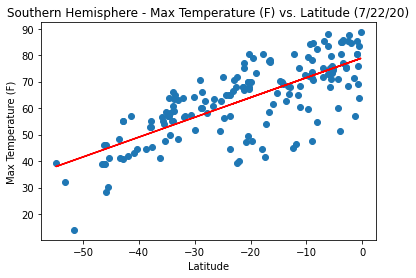

In [21]:
y = 'Max Temperature (F)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and maximum temperature in the northern and southern hemispheres. 

The model for the northern hemisphere illustrates a weak negative correlation between the latitude and the maximum tempeature. As the latitude increases, the maximum temperature decreases.

The model for the southern hemisphere illustrates a moderate-to-weak positive correlation between the latitude and the maximum tempeature compared to the model for the northern hemisphere. As the latitude increases, the maximum temperature also increases. The r-squared of ~0.557 for the southern hemispheremodel indicates a stronger correlation, compared to the norther hemisphere model (r-squared of ~0.464).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012076597652898508


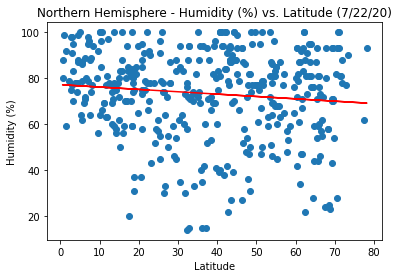

In [22]:
y = 'Humidity (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00018102960316614773


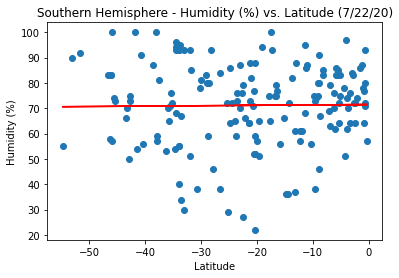

In [23]:
y = 'Humidity (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage humdity in the northern and southern hemispheres. 

The models for both the northern and southern hemisphere illustrate that there are almost no correlation between the percentage humdity and the latitude, as indicated by the very low r-squared of almost 0. Though the model for the northern hemisphere has a higher r-squared than the model for the southern hemisphere, the correlation is still very weak and almost 0. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00212449083834036


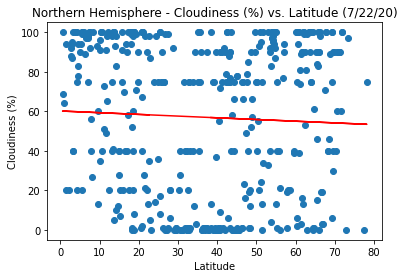

In [24]:
y = 'Cloudiness (%)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008982517439360571


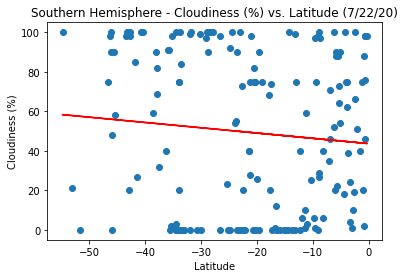

In [25]:
y = 'Cloudiness (%)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and percentage cloudiness in the northern and southern hemispheres. 

The models for both the northern and southern hemisphere illustrate that there are almost no correlation between the percentage cloudiness and the latitude, as indicated by the r-squared of almost 0. Though the model for the southern hemisphere has a higher r-squared than the model for the northern hemisphere, the correlation is still very weak and almost 0. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026378800984171096


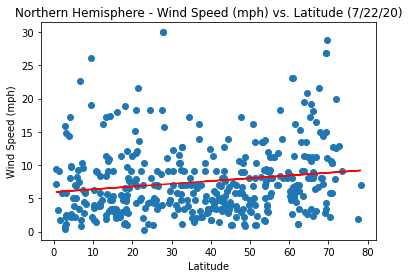

In [26]:
y = 'Wind Speed (mph)'
hem = 'Northern'
plotweather(northern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.0508501122813227e-07


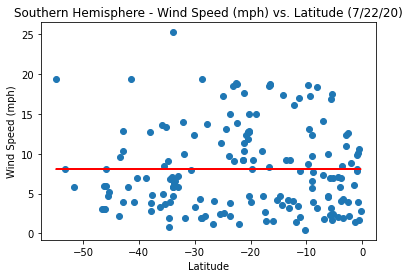

In [27]:
y = 'Wind Speed (mph)'
hem = 'Southern'
plotweather(southern_hem_df, y, hem)

# Save the plot as png file
plt.savefig(f"Output Data/{hem} Hemisphere - {y} vs. Latitude.png")

plt.show()

The linear regression models the correlation between latitude and wind speed in the northern and southern hemispheres.

TThe models for both the northern and southern hemisphere illustrate that there are almost no correlation between the wind speed and the latitude, as indicated by the r-squared of near 0 for the nothern hemisphere model and the the r-squared of essentially 0 for the southern hemisphere model.